#### **PART 01 Data Loading:**

**The Work Mythology in Part 01 Data Loading and Intial Cleaning:**

>**Steps:**
>1. Import Packages
>2. Ensuring Folder Structure, a main file named data, and subfolders: Raw and Clean.
>3. Download files from the Web into a raw file in the home repository
>4. Additional Data loading, such as converting and unzipping a  file
>5. Identifying which columns to keep from raw file structure
>6. Build CLEAN versions in data/clean (from RAW)
>7.  Load from data/clean with selected columns
>8.  Clean column names function that does the initial cleaning on the data before in-depth analysis

In [203]:
# Step 01 - Import packages
import os
import urllib.request
import zipfile
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Step 02 - Ensuring Folder Structure: Create a main file named data and subfolders named raw and clean.
def ensure_data_folders():
    folders = ["data/raw", "data/clean"]
    
    for folder in folders:
        if not os.path.isdir(folder):
            os.makedirs(folder)
            print(f"Created folder: {folder}")
        else:
            print(f"Folder already exists: {folder}")

    print("--" * 30)

ensure_data_folders()

Created folder: data/raw
Created folder: data/clean
------------------------------------------------------------


In [3]:
# Step 03 - Download files from the Web into raw file on home repositry
def download_if_missing(url, local_name):
    dest = os.path.join("data", "raw", local_name)
    
    print(f"Let me check: {local_name}")

    if os.path.isfile(dest):
        print("File already exists — skipping download.")
    else:
        print(f"Downloading from:\n    {url}")
        urllib.request.urlretrieve(url, dest)
        print("Download complete — saved.")

    print("--" * 20)
    return dest 

# Base File data folder attributed by CASA
base = "https://orca.casa.ucl.ac.uk/~jreades/data/"

orca_files = [
    "20250615-London-listings.csv.gz",
    "MSOA-2011.gpkg"
]

# Extra files we saw necessary to add for further analysis
extra_files = {
    "housing_msoa.csv":
        "https://data.london.gov.uk/download/2z0yn/20264159-36cb-4aa2-8371-ae884ae83e88/msoa-data.csv",

    "local-authority-rents-borough.xlsx":
        "https://data.london.gov.uk/download/2g1k1/2a74e893-3188-4cb8-b5a7-087a1965b623/local-authority-rents-borough.xlsx",

    "london_boroughs.zip":
        "https://data.london.gov.uk/download/20od9/08d31995-dd27-423c-a987-57fe8e952990/London-wards-2018.zip",
    
    "council_tax_borough.xlsx":
        "https://data.london.gov.uk/download/expnl/59cc7c37-da8f-4158-bc47-491c3d167b05/council-tax-bands-borough.xlsx"
}

local_paths = []

print("!STARTING ORCA DOWNLOADS!")

for fname in orca_files:
    url = base + fname
    path = download_if_missing(url, fname)
    local_paths.append(path)

print("!STARTING DATASTORE DOWNLOADS!")

for local_name, url in extra_files.items():
    path = download_if_missing(url, local_name)
    local_paths.append(path)

!STARTING ORCA DOWNLOADS!
Let me check: 20250615-London-listings.csv.gz
    https://orca.casa.ucl.ac.uk/~jreades/data/20250615-London-listings.csv.gz
Download complete — saved.
----------------------------------------
Let me check: MSOA-2011.gpkg
    https://orca.casa.ucl.ac.uk/~jreades/data/MSOA-2011.gpkg
Download complete — saved.
----------------------------------------
!STARTING DATASTORE DOWNLOADS!
Let me check: housing_msoa.csv
    https://data.london.gov.uk/download/2z0yn/20264159-36cb-4aa2-8371-ae884ae83e88/msoa-data.csv
Download complete — saved.
----------------------------------------
Let me check: local-authority-rents-borough.xlsx
    https://data.london.gov.uk/download/2g1k1/2a74e893-3188-4cb8-b5a7-087a1965b623/local-authority-rents-borough.xlsx
Download complete — saved.
----------------------------------------
Let me check: london_boroughs.zip
    https://data.london.gov.uk/download/20od9/08d31995-dd27-423c-a987-57fe8e952990/London-wards-2018.zip
Download complete — sav

In [88]:
# Step 04 -  Additional Data loading, such as converting and unzipping a  file

# Convert Rent file from Excel to CSV
print("!CONVERTING RENT EXCEL (Local Authority Sheet) TO CSV!")

excel_path = "data/raw/local-authority-rents-borough.xlsx"
csv_path   = "data/raw/local-authority-rents-borough.csv"

if os.path.isfile(csv_path):
    print(f"CSV already exists, skipping conversion: {csv_path}")
else:
    if not os.path.isfile(excel_path):
        print(f"Excel file not found: {excel_path}")
    else:
        rents_xlsx = pd.read_excel(
            excel_path,
            sheet_name="Local Authority Rents"
        )
        rents_xlsx.to_csv(csv_path, index=False)
        print(f"Converted Excel to CSV: {csv_path}")

print("--" * 20)


# Convert Council Tax file from Excel to CSV
print("!CONVERTING COUNCIL TAX EXCEL (2024-2025) TO CSV!")

excel_path = "data/raw/council_tax_borough.xlsx"
csv_path   = "data/raw/council_tax_borough.csv"

if os.path.isfile(csv_path):
    print(f"CSV already exists, skipping conversion: {csv_path}")
else:
    if not os.path.isfile(excel_path):
        print(f"Excel file not found: {excel_path}")
    else:
        tax_xlsx = pd.read_excel(
            excel_path,
            sheet_name="2024-25"
        )
        tax_xlsx.to_csv(csv_path, index=False)
        print(f"Converted Excel to CSV: {csv_path}")

print("--" * 20)

print("!UNZIPPING LONDON BOROUGHS SHAPEFILE!")

# unzipping Shape File of London Borough
zip_path = "data/raw/london_boroughs.zip"
if os.path.isfile(zip_path):
    with zipfile.ZipFile(zip_path, "r") as zip_ref:
        zip_ref.extractall("data/raw/")
    print("Unzipped london_boroughs.zip")
else:
    print("Zip file not found: data/raw/london_boroughs.zip")

print("--" * 20)

!CONVERTING RENT EXCEL (Local Authority Sheet) TO CSV!
CSV already exists, skipping conversion: data/raw/local-authority-rents-borough.csv
----------------------------------------
!CONVERTING COUNCIL TAX EXCEL (2024-2025) TO CSV!
CSV already exists, skipping conversion: data/raw/council_tax_borough.csv
----------------------------------------
!UNZIPPING LONDON BOROUGHS SHAPEFILE!
Unzipped london_boroughs.zip
----------------------------------------


In [89]:
# Step 05 - Identifying which columns to keep from raw file structure

#Listings 
cols_listings = [
    'id', 'listing_url', 'last_scraped', 'name', 
    'description', 'host_id', 'host_since', 'host_is_superhost', 
    'host_listings_count', 'host_total_listings_count',
    'neighbourhood_cleansed', 'latitude', 'longitude', 
    'property_type', 'room_type', 'accommodates', 
    'price', 'minimum_nights', 'maximum_nights', 
    'minimum_minimum_nights','maximum_minimum_nights',
    'minimum_maximum_nights','maximum_maximum_nights',
    'minimum_nights_avg_ntm','maximum_nights_avg_ntm',
    'availability_365',
    'number_of_reviews', 
    'first_review', 'last_review',
    'review_scores_rating', 
    'calculated_host_listings_count',
    'calculated_host_listings_count_entire_homes',
    'calculated_host_listings_count_private_rooms',
    'calculated_host_listings_count_shared_rooms',
    'reviews_per_month',
    'estimated_revenue_l365d',
    'estimated_occupancy_l365d'
]

# Housing (2011 only)
cols_housing = ["Middle Super Output Area",
                 "MSOA Name",
                 "Households (2011);All Households;"
                 ]

# Rent: only latest year
cols_rent = ["Code",
              "New Code",
              "Area",
              "2023-24"
             ]

# Council tax: band D comparison as it is the Band used as reference by the GLA !!! ADD REF
cols_tax = [
    "Code",
    "Local authority",
    "Band D"
]

In [90]:
# Step 06 -  Build CLEAN versions in data/clean (from RAW)
# Each File goes through the raw version and into clean which would allow us to manipulate the data without losing the raw

print("!CREATING CLEAN VERSIONS!")

# Listings
raw_listings_path = "data/raw/20250615-London-listings.csv.gz"
clean_listings_path = "data/clean/20250615-London-listings.csv.gz"

if not os.path.isfile(clean_listings_path):
    listings_raw = pd.read_csv(
        raw_listings_path,
        compression="gzip",
        encoding="latin1",
        low_memory=False
    )
    listings = listings_raw[cols_listings]
    listings.to_csv(
        clean_listings_path,
        index=False,
        compression="gzip"
    )
    print("Saved cleaned listings to data/clean")
else:
    print("Clean listings already exist, skipping.")

# MSOA
raw_msoa_path = "data/raw/MSOA-2011.gpkg"
clean_msoa_path = "data/clean/MSOA-2011.gpkg"

if not os.path.isfile(clean_msoa_path):
    msoa = gpd.read_file(raw_msoa_path)
    msoa.to_file(clean_msoa_path, driver="GPKG")
    print("Saved MSOA to data/clean")
else:
    print("Clean MSOA already exists, skipping.")

# Rent (already converted to CSV in raw)
raw_rent_path = "data/raw/local-authority-rents-borough.csv"
clean_rent_path = "data/clean/local-authority-rents-borough.csv"

if not os.path.isfile(clean_rent_path):
    rent_raw = pd.read_csv(raw_rent_path, encoding="latin1", low_memory=False)
    rent = rent_raw[cols_rent]
    rent.to_csv(clean_rent_path, index=False)
    print("Saved cleaned rent to data/clean")
else:
    print("Clean rent already exists, skipping.")

# Housing
raw_housing_path = "data/raw/housing_msoa.csv"
clean_housing_path = "data/clean/housing_msoa.csv"

if not os.path.isfile(clean_housing_path):
    housing_raw = pd.read_csv(raw_housing_path, encoding="latin1", low_memory=False)
    housing = housing_raw[cols_housing]
    housing.to_csv(clean_housing_path, index=False)
    print("Saved cleaned housing to data/clean")
else:
    print("Clean housing already exists, skipping.")

# Borough and Wards
borough_clean_dir = "data/clean/London-wards-2018_ESRI"
os.makedirs(borough_clean_dir, exist_ok=True)

# this path depends on how the zip unzips 
raw_borough_path = "data/raw/London-wards-2018_ESRI/London_Ward.shp"

clean_borough_path = os.path.join(borough_clean_dir, "London_Ward.shp")

if not os.path.isfile(clean_borough_path):
    borough = gpd.read_file(raw_borough_path)
    borough.to_file(clean_borough_path)
    print("Saved borough shapefile to data/clean")
else:
    print("Clean borough shapefile already exists, skipping.")

# Council Tax
raw_tax_path = "data/raw/council_tax_borough.csv"
clean_tax_path = "data/clean/council_tax_borough.csv"

if not os.path.isfile(clean_tax_path):
    council_tax_raw = pd.read_csv(raw_tax_path, encoding="latin1", low_memory=False)
    council_tax = council_tax_raw[cols_tax]
    council_tax.to_csv(clean_tax_path, index=False)
    print("Saved cleaned council tax to data/clean")
else:
    print("Clean council tax already exists, skipping.")

print("**All cleaned files saved to data/clean/**")


!CREATING CLEAN VERSIONS!
Clean listings already exist, skipping.
Clean MSOA already exists, skipping.
Clean rent already exists, skipping.
Clean housing already exists, skipping.
Clean borough shapefile already exists, skipping.
Clean council tax already exists, skipping.
**All cleaned files saved to data/clean/**


In [91]:
# Step 07 -  Load from data/clean with selected columns

print("!LOADING FILES (SELECTED COLUMNS ONLY)!")

# Listings
listings = pd.read_csv(
    "data/clean/20250615-London-listings.csv.gz",
    compression="gzip",
    usecols=cols_listings,
    encoding="latin1",
    low_memory=False
)
print(f"Step 01: listings loaded: {listings.shape[0]:,} rows, {listings.shape[1]} columns")

# MSOA
msoa = gpd.read_file("data/clean/MSOA-2011.gpkg")
print(f"Step 02: msoa loaded: {msoa.shape[0]:,} polygons, {msoa.shape[1]} columns")

# Rent
rent = pd.read_csv(
    "data/clean/local-authority-rents-borough.csv",
    usecols=cols_rent,
    encoding="latin1",
    low_memory=False
)
print(f"Step 03: rent loaded: {rent.shape[0]:,} rows, {rent.shape[1]} columns")

# Housing
housing = pd.read_csv(
    "data/clean/housing_msoa.csv",
    usecols=cols_housing,
    encoding="latin1",
    low_memory=False
)
print(f"Step 04: housing loaded: {housing.shape[0]:,} rows, {housing.shape[1]} columns")

# Borough boundary polygons
borough = gpd.read_file("data/clean/London-wards-2018_ESRI/London_Ward.shp")
print(f"Step 05: borough loaded: {borough.shape[0]:,} polygons, {borough.shape[1]} columns")

# Council Tax
council_tax = pd.read_csv(
    "data/clean/council_tax_borough.csv",
    usecols=cols_tax,
    encoding="latin1",
    low_memory=False
)
print(f"Step 06: council tax loaded: {council_tax.shape[0]:,} rows, {council_tax.shape[1]} columns")

print("**All selected files successfully loaded.**")

!LOADING FILES (SELECTED COLUMNS ONLY)!
Step 01: listings loaded: 96,651 rows, 37 columns
Step 02: msoa loaded: 983 polygons, 13 columns
Step 03: rent loaded: 46 rows, 4 columns
Step 04: housing loaded: 984 rows, 3 columns
Step 05: borough loaded: 657 polygons, 7 columns
Step 06: council tax loaded: 34 rows, 3 columns
**All selected files successfully loaded.**


In [92]:
# Step 08 - Clean column names function that does the initial cleaning on the data before in-depth analysis
def clean_names(df):
    df = df.copy()
    df.columns = (
        df.columns
        .str.strip()
        .str.lower()
        .str.replace(" ", "_")
        .str.replace(r"[^\w]", "", regex=True)
    )
    return df

dfs = {
    "listings": listings,
    "msoa": msoa,
    "rent": rent,
    "housing": housing,
    "borough": borough,
    "council_tax": council_tax
}

for name, frame in dfs.items():
    dfs[name] = clean_names(frame)
    print(f"Cleaned column names for: {name}")

listings     = dfs["listings"]
msoa         = dfs["msoa"]
rent         = dfs["rent"]
housing      = dfs["housing"]
borough      = dfs["borough"]
council_tax  = dfs["council_tax"]


Cleaned column names for: listings
Cleaned column names for: msoa
Cleaned column names for: rent
Cleaned column names for: housing
Cleaned column names for: borough
Cleaned column names for: council_tax


In [93]:
borough.columns
# Just to make sure its clean and not manipulated

Index(['name', 'gss_code', 'district', 'lagsscode', 'hectares', 'nonld_area',
       'geometry'],
      dtype='object')

#### **Question 3: How many properties would be affected by the opposition’s proposal?** Emilia

In Our Evaluation, we want to create an extreme scenario to evaluate the magnitude of the effect of increased council tax: how many short-term rental properties owned by professional landlords would become unprofitable if council tax rates were increased. This requires linking landlord type, location, borough-level council tax, and the property’s estimated monthly profit, as well as evaluating companies with multiple listings and their profit-and-loss statements. 

**Data:**
1. Professional landlord listings (from Q2)
    - kkkk
2. Borough boundaries (spatial join)
    - kkkk
3. Borough-level council tax
    - The file has been selected by the year 2024-2025 and only filtered to Band D, which the GLA references as a starting point to evaluate the overall borough tax.
    - The value that we extract is associated with the annual tax *(column Band D, which we later rename as council tax).*
4. Monthly profit estimates for each listing
    - kkkk

**Output:** FIX THIS
1. Number of professional landlords
2. Distribution of their listings across boroughs
3. Current vs future council tax per borough
4. Number and percentage of listings becoming unprofitable
5. Scatter plot showing profit before and after tax increase and affected properties

**Issues:** FIX THIS
1. Borough-level council tax bands vary depending on property type; using averages simplifies reality.
2. Monthly profit estimates depend on assumptions about occupancy and nightly rates.
3. Listings with missing borough information must be dropped or cleaned.
4. Definition of “professional landlord” strongly shapes results.
5. The proposed % tax increase is simplified and may not reflect the real banding structure.

**The Work Mythology For Question 3:**

>**Steps:**
>1. Clean Files and Rename Columns
>2. Clean Borough Shape file and reproject CRS


In [100]:
borough_shp.columns

Index(['name', 'gss_code', 'district', 'lagsscode', 'hectares', 'nonld_area',
       'geometry', 'borough_code'],
      dtype='object')

In [110]:
# ============================================================
# STEP 01 — Clean & Align Council Tax to Shapefile USING CODE
# ============================================================

council_tax = council_tax.rename(columns={
    'local_authority': 'borough_name_raw',
    'band_d': 'council_tax',
    'code': 'borough_code'     # IMPORTANT
})

# Clean borough code
council_tax['borough_code'] = (
    council_tax['borough_code']
    .astype(str)
    .str.strip()
)

# Clean council tax values
council_tax['council_tax'] = (
    council_tax['council_tax']
    .astype(str)
    .str.replace(",", "", regex=False)
    .str.strip()
    .astype(float)
)

# Keep only the needed columns
council_tax = council_tax[['borough_code', 'borough_name_raw', 'council_tax']]

print("clean council tax:", council_tax.shape)
display(council_tax.head())

clean council tax: (34, 3)


,borough_code,borough_name_raw,council_tax
0,nan,NaN,NaN
1,E09000001,City of London,1217.89
2,E09000002,Barking & Dagenham,2002.75
3,E09000003,Barnet,1943.24
4,E09000004,Bexley,2155.04


In [105]:
borough.head()

,name,gss_code,district,lagsscode,hectares,nonld_area,geometry,borough_code,borough_name
0,Chessington South,E05000405,Kingston upon Thames,E09000021,755.173,0.0,"POLYGON ((516401.596 160201.802, 516407.302 16...",E09000021,chessington south
1,Tolworth and Hook Rise,E05000414,Kingston upon Thames,E09000021,259.464,0.0,"POLYGON ((519552.998 164295.6, 519508.096 1643...",E09000021,tolworth and hook rise
2,Berrylands,E05000401,Kingston upon Thames,E09000021,145.390,0.0,"POLYGON ((518107.499 167303.399, 518114.301 16...",E09000021,berrylands
3,Alexandra,E05000400,Kingston upon Thames,E09000021,268.506,0.0,"POLYGON ((520336.7 165105.498, 520332.198 1651...",E09000021,alexandra
4,Beverley,E05000402,Kingston upon Thames,E09000021,187.821,0.0,"POLYGON ((521201.203 169275.505, 521204.303 16...",E09000021,beverley


In [111]:
# ============================================================
# STEP 02 — Clean Borough Shapefile (CODE-BASED)
# ============================================================

# Ensure CRS is correct
borough = borough.to_crs(epsg=4326)

# Extract borough code from lagsscode
borough['borough_code'] = (
    borough['lagsscode']
    .astype(str)
    .str.strip()
)

# Clean borough name from shapefile
borough['borough_name'] = (
    borough['district']
    .astype(str)
    .str.lower()
    .str.replace("&", "and", regex=False)
    .str.replace("-", " ", regex=False)
    .str.strip()
)

# Keep essential columns
borough_shp = borough[['borough_code', 'borough_name', 'geometry']].copy()

print("clean borough shapefile:", borough_shp.shape)
display(borough_shp.head())

clean borough shapefile: (657, 3)


,borough_code,borough_name,geometry
0,E09000021,kingston upon thames,"POLYGON ((-0.33066 51.32901, -0.33057 51.32909..."
1,E09000021,kingston upon thames,"POLYGON ((-0.28407 51.36515, -0.28471 51.3654,..."
2,E09000021,kingston upon thames,"POLYGON ((-0.30383 51.39249, -0.30373 51.39252..."
3,E09000021,kingston upon thames,"POLYGON ((-0.27255 51.37226, -0.27261 51.37227..."
4,E09000021,kingston upon thames,"POLYGON ((-0.25871 51.40956, -0.25867 51.40955..."


In [112]:
# ============================================================
# STEP 03 — Merge Council Tax Into Borough Shapefile (CODE MATCH)
# ============================================================

borough_tax = borough_shp.merge(
    council_tax[['borough_code', 'council_tax']],
    on='borough_code',
    how='left'
)

print("borough_tax merged:", borough_tax.shape)
print("missing council tax:", borough_tax['council_tax'].isna().sum())

# Inspect any missing codes
missing_codes = borough_tax[borough_tax['council_tax'].isna()]
display(missing_codes)

borough_tax merged: (657, 4)
missing council tax: 0


,borough_code,borough_name,geometry,council_tax


In [113]:
# ============================================================
# STEP 05 — Spatial Join Listings to Borough Tax Data
# ============================================================

listings_gdf = gpd.GeoDataFrame(
    listings_fulltime,
    geometry=gpd.points_from_xy(
        listings_fulltime.longitude,
        listings_fulltime.latitude
    ),
    crs="EPSG:4326"
)

listings_gdf = gpd.sjoin(
    listings_gdf,
    borough_tax[['borough_code', 'borough_name', 'council_tax', 'geometry']],
    how='left',
    predicate='within'
)

print("after spatial join:", listings_gdf.shape)
print("missing council tax after join:", listings_gdf['council_tax'].isna().sum())
display(listings_gdf.head())

after spatial join: (32616, 16)
missing council tax after join: 0


,id,host_id,latitude,longitude,price,availability_365,estimated_occupancy_l365d,estimated_revenue_l365d,host_total_listings_count,room_type,is_professional_host,geometry,index_right,borough_code,borough_name,council_tax
0,264776,1389063,51.44306,-0.01948,297.0,293,110,32670.0,12.0,entire home/apt,True,POINT (-0.01948 51.44306),265,E09000023,lewisham,2037.98
1,264777,1389063,51.44284,-0.01997,98.0,318,37,3626.0,12.0,entire home/apt,True,POINT (-0.01997 51.44284),265,E09000023,lewisham,2037.98
2,264778,1389063,51.44359,-0.02275,148.0,302,55,8140.0,12.0,entire home/apt,True,POINT (-0.02275 51.44359),264,E09000023,lewisham,2037.98
3,264779,1389063,51.44355,-0.02309,144.0,328,64,9216.0,12.0,entire home/apt,True,POINT (-0.02309 51.44355),264,E09000023,lewisham,2037.98
4,264780,1389063,51.44333,-0.02307,157.0,255,37,5809.0,12.0,entire home/apt,True,POINT (-0.02307 51.44333),264,E09000023,lewisham,2037.98


In [125]:
# ============================================================
# Step 06 — Q3 ANALYSIS MODEL (Revenue + Professional Hosts)
# ============================================================

# Professional host flag (ensure it's here after all slicing)
listings_gdf['is_professional_host'] = (
    listings_gdf['host_total_listings_count'] > 1
)

# Keep only professional full-time entire homes
listings_prof = listings_gdf[listings_gdf['is_professional_host']].copy()

print("professional full-time listings:", listings_prof.shape)

# Clean numeric columns
listings_prof['price'] = pd.to_numeric(listings_prof['price'], errors='coerce')
listings_prof['estimated_occupancy_l365d'] = pd.to_numeric(
    listings_prof['estimated_occupancy_l365d'], errors='coerce'
)
listings_prof['council_tax'] = pd.to_numeric(
    listings_prof['council_tax'], errors='coerce'
)

# ------------------------------------------------------------
# Annual Airbnb revenue = nightly price × annual occupied nights
# ------------------------------------------------------------
listings_prof['airbnb_annual_revenue'] = (
    listings_prof['price'] * listings_prof['estimated_occupancy_l365d']
)

# In this model: “current advantage” = revenue before tax
listings_prof['net_advantage_current'] = listings_prof['airbnb_annual_revenue']

print("sample revenue calculations:")
display(
    listings_prof[
        ['price', 'estimated_occupancy_l365d', 'airbnb_annual_revenue']
    ].head()
)

professional full-time listings: (26329, 16)
sample revenue calculations:


,price,estimated_occupancy_l365d,airbnb_annual_revenue
0,297.0,110,32670.0
1,98.0,37,3626.0
2,148.0,55,8140.0
3,144.0,64,9216.0
4,157.0,37,5809.0


In [140]:
# ============================================================
# Step 07 — POLICY MODEL (Tax Multiplier)
# ============================================================

multiplier = 1  # a 50% percent encrese ie 150% 

listings_prof['policy_charge'] = listings_prof['council_tax'] * multiplier

listings_prof['net_advantage_after'] = (
    listings_prof['airbnb_annual_revenue']
    - listings_prof['policy_charge']
)

print("sample after-policy values:")
display(
    listings_prof[
        ['airbnb_annual_revenue', 'council_tax', 'policy_charge', 'net_advantage_after']
    ].head()
)

sample after-policy values:


,airbnb_annual_revenue,council_tax,policy_charge,net_advantage_after
0,32670.0,2037.98,2037.98,30632.02
1,3626.0,2037.98,2037.98,1588.02
2,8140.0,2037.98,2037.98,6102.02
3,9216.0,2037.98,2037.98,7178.02
4,5809.0,2037.98,2037.98,3771.02


In [141]:
# ============================================================
# Step 08 — FLAG AFFECTED LISTINGS (NEGATIVE PROFIT ONLY)
# ============================================================

# A listing is affected ONLY if it becomes unprofitable
listings_prof['affected'] = listings_prof['net_advantage_after'] < 0

n_total = len(listings_prof)
n_affected = listings_prof['affected'].sum()
pct_affected = (n_affected / n_total) * 100

print(
    f"Out of {n_total:,} professional full-time listings, "
    f"{n_affected:,} ({pct_affected:.1f}%) "
    f"are affected under a {multiplier} × Band D policy."
)


Out of 26,329 professional full-time listings, 9,800 (37.2%) are affected under a 1 × Band D policy.


In [142]:
losers = listings_prof[listings_prof['affected']]

print("Top 20 biggest losers:")
display(
    losers.sort_values('net_advantage_after')
          .head(20)[['id','borough_name','price',
                     'estimated_occupancy_l365d',
                     'airbnb_annual_revenue',
                     'council_tax','net_advantage_after']]
)

Top 20 biggest losers:


,id,borough_name,price,estimated_occupancy_l365d,airbnb_annual_revenue,council_tax,net_advantage_after
96623,1439224669368148143,kingston upon thames,147.0,0,0.0,2375.35,-2375.35
42284,654553716979592341,kingston upon thames,98.0,0,0.0,2375.35,-2375.35
87530,1365340702882795800,kingston upon thames,320.0,0,0.0,2375.35,-2375.35
35227,47357929,kingston upon thames,140.0,0,0.0,2375.35,-2375.35
42109,655420041241203313,kingston upon thames,235.0,0,0.0,2375.35,-2375.35
43634,690485945360031990,kingston upon thames,270.0,0,0.0,2375.35,-2375.35
83025,1320450228026206506,kingston upon thames,162.0,0,0.0,2375.35,-2375.35
93393,1414599477970299201,kingston upon thames,94.0,0,0.0,2375.35,-2375.35
72664,1196952498808339146,kingston upon thames,128.0,0,0.0,2375.35,-2375.35
23046,27677034,kingston upon thames,58.0,0,0.0,2375.35,-2375.35


In [143]:
missing_occ = (listings_prof['estimated_occupancy_l365d'].isna()
               | (listings_prof['estimated_occupancy_l365d'] == 0))

print("Listings with missing/zero occupancy:", missing_occ.sum())
print("Percentage:", missing_occ.mean() * 100)

Listings with missing/zero occupancy: 8912
Percentage: 33.84860799878461


Remove zero-occupancy listings for revenue modelling
“Approx. 34% of listings have zero estimated occupancy.
These appear as extreme loss-making cases but reflect missing data rather than actual performance.
To avoid biasing the profitability analysis, these listings were excluded from profit modelling.”

In [178]:
# Remove listings with missing or extremely low occupancy (< 32 nights)
listings_prof_clean = listings_prof[
    listings_prof['estimated_occupancy_l365d'] >= 30
].copy()

print("Cleaned professional listings (≥30 nights):", listings_prof_clean.shape)

Cleaned professional listings (≥30 nights): (9046, 21)


In [204]:
# Keep a copy of the original for reporting if needed
listings_prof_all = listings_prof.copy()

# Mask for valid occupancy (> 0 and not NaN)
mask_valid = listings_prof_all['estimated_occupancy_l365d'] >= 30

print("Total professional full-time listings (before clean):",
      listings_prof_all.shape[0])
print("Listings with missing/zero occupancy:",
      (~mask_valid).sum())

# Use ONLY valid-occupancy listings for the revenue & tax model
listings_prof = listings_prof_all.loc[mask_valid].copy()

print("Professional listings used in profit model (after clean):",
      listings_prof.shape[0])

Total professional full-time listings (before clean): 9046
Listings with missing/zero occupancy: 0
Professional listings used in profit model (after clean): 9046


In [205]:
# Recompute revenue on the cleaned subset
listings_prof['airbnb_annual_revenue'] = (
    listings_prof['price'] * listings_prof['estimated_occupancy_l365d']
)

listings_prof['net_advantage_current'] = listings_prof['airbnb_annual_revenue']

In [206]:
multiplier = 2  # or 2, 5, 10, etc.

listings_prof['policy_charge'] = listings_prof['council_tax'] * multiplier

listings_prof['net_advantage_after'] = (
    listings_prof['airbnb_annual_revenue']
    - listings_prof['policy_charge']
)

In [207]:
listings_prof['affected'] = listings_prof['net_advantage_after'] < 0

n_total = len(listings_prof)
n_affected = listings_prof['affected'].sum()
pct_affected = n_affected / n_total * 100

print(
    f"Out of {n_total:,} professional full-time listings (with non-zero occupancy), "
    f"{n_affected:,} ({pct_affected:.1f}%) are affected under a {multiplier} × Band D policy."
)

Out of 9,046 professional full-time listings (with non-zero occupancy), 25 (0.3%) are affected under a 2 × Band D policy.


In [208]:
losers = listings_prof[listings_prof['affected']]

print("Top 5 biggest losers:")
display(
    losers.sort_values('net_advantage_after')
          .head(5)[['id','borough_name','price',
                     'estimated_occupancy_l365d',
                     'airbnb_annual_revenue',
                     'council_tax','net_advantage_after']]
)

Top 5 biggest losers:


,id,borough_name,price,estimated_occupancy_l365d,airbnb_annual_revenue,council_tax,net_advantage_after
62884,1068604601474848812,bexley,34.0,64,2176.0,2155.04,-2134.08
86539,1356407995535691336,croydon,45.0,64,2880.0,2366.91,-1853.82
81417,1302892224697716291,merton,40.0,64,2560.0,1999.28,-1438.56
72834,1201499295519885940,bexley,45.0,64,2880.0,2155.04,-1430.08
41665,646174702645211170,haringey,37.0,83,3071.0,2107.32,-1143.64


In [209]:
# keep only listings with at least 30 booked nights
listings_prof = listings_prof[listings_prof['estimated_occupancy_l365d'] >= 30].copy()
print("Professional full-time listings with ≥30 nights:", listings_prof.shape)

Professional full-time listings with ≥30 nights: (9046, 21)


In [210]:
# all listings (before full-time / occupancy filters)
n_all_listings = listings_q3.shape[0]
n_prof_listings_all = listings_q3[listings_q3['is_professional_host']].shape[0]
n_prof_hosts = listings_q3[listings_q3['is_professional_host']]['host_id'].nunique()

print(f"Total listings in dataset: {n_all_listings:,}")
print(f"Professional listings (all room types): {n_prof_listings_all:,}")
print(f"Unique professional hosts: {n_prof_hosts:,}")

# professional full-time (≥30 nights) used in the model
n_prof_fulltime = listings_prof.shape[0]
print(f"Professional full-time listings used in policy model (≥30 nights): {n_prof_fulltime:,}")

Total listings in dataset: 96,651
Professional listings (all room types): 67,764
Unique professional hosts: 26,921
Professional full-time listings used in policy model (≥30 nights): 9,046


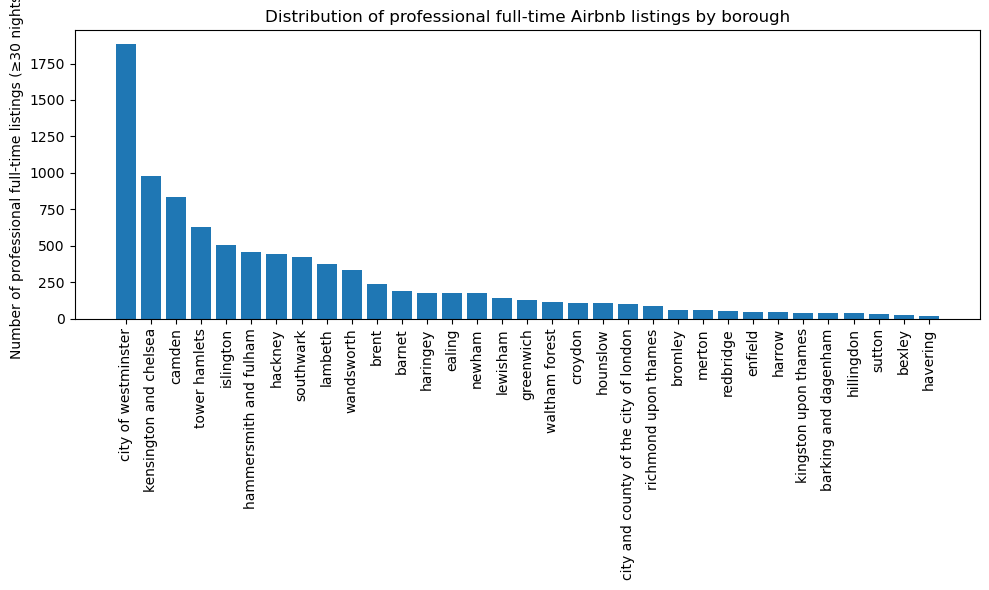

In [211]:
borough_summary = (
    listings_prof
    .groupby('borough_name')
    .agg(
        n_listings=('id', 'count')
    )
    .reset_index()
)

# sort by number of professional listings
borough_counts = borough_summary.sort_values('n_listings', ascending=False)

plt.figure(figsize=(10,6))
plt.bar(borough_counts['borough_name'], borough_counts['n_listings'])
plt.xticks(rotation=90)
plt.ylabel('Number of professional full-time listings (≥30 nights)')
plt.title('Distribution of professional full-time Airbnb listings by borough')
plt.tight_layout()
plt.show()

In [212]:
# total annual revenue & total current tax for professional full-time listings
total_revenue = listings_prof['airbnb_annual_revenue'].sum()
total_tax_current = listings_prof['council_tax'].sum()

tax_share_pct = 100 * total_tax_current / total_revenue

print(f"Total Airbnb revenue (pro full-time, ≥30 nights): £{total_revenue:,.0f}")
print(f"Total council tax (Band D, 1×): £{total_tax_current:,.0f}")
print(f"Council tax is {tax_share_pct:.2f}% of total Airbnb revenue")

Total Airbnb revenue (pro full-time, ≥30 nights): £301,891,232
Total council tax (Band D, 1×): £14,652,334
Council tax is 4.85% of total Airbnb revenue


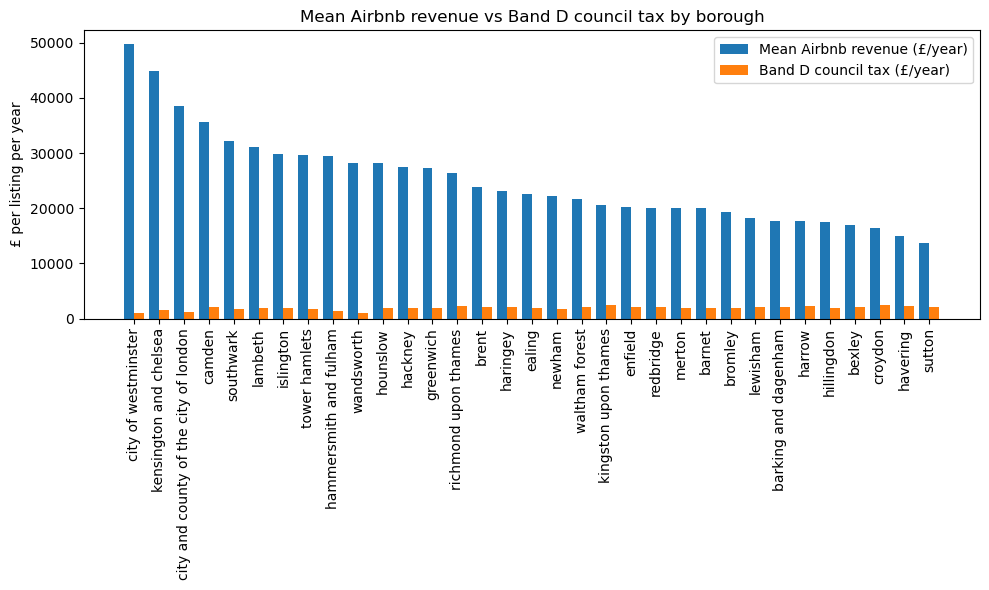

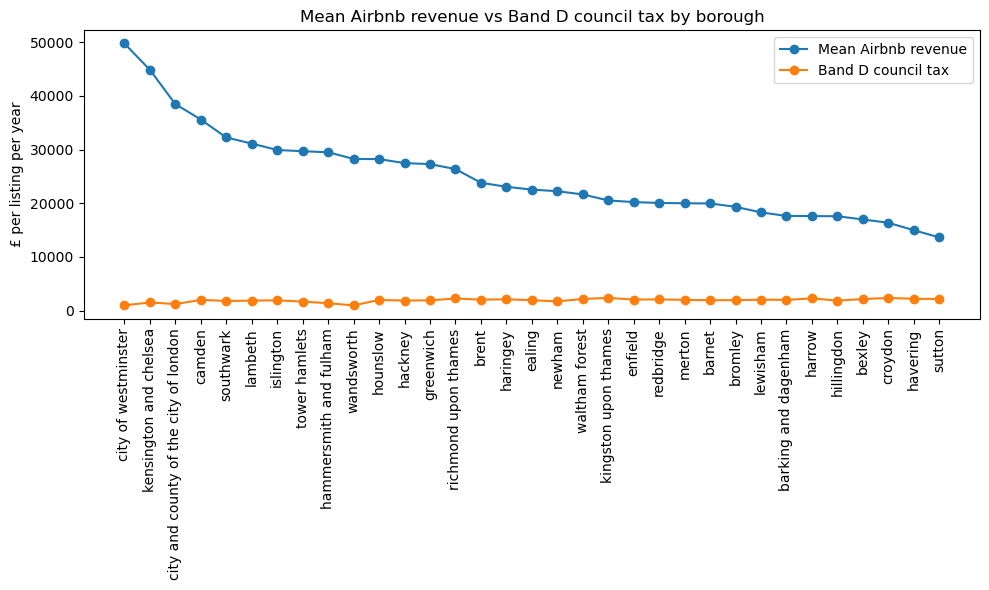

City Of Westminster: Airbnb ≈ £49,784/yr, tax ≈ £975/yr (2.0% of revenue)
Kensington And Chelsea: Airbnb ≈ £44,867/yr, tax ≈ £1,530/yr (3.4% of revenue)
City And County Of The City Of London: Airbnb ≈ £38,489/yr, tax ≈ £1,218/yr (3.2% of revenue)


In [213]:
borough_rev_tax = (
    listings_prof
    .groupby('borough_name')
    .agg(
        mean_airbnb_revenue=('airbnb_annual_revenue', 'mean'),
        mean_council_tax=('council_tax', 'mean')
    )
    .reset_index()
    .sort_values('mean_airbnb_revenue', ascending=False)
)

plt.figure(figsize=(10,6))
x = np.arange(len(borough_rev_tax))
width = 0.4

plt.bar(x - width/2, borough_rev_tax['mean_airbnb_revenue'],
        width=width, label='Mean Airbnb revenue (£/year)')
plt.bar(x + width/2, borough_rev_tax['mean_council_tax'],
        width=width, label='Band D council tax (£/year)')

plt.xticks(x, borough_rev_tax['borough_name'], rotation=90)
plt.ylabel('£ per listing per year')
plt.title('Mean Airbnb revenue vs Band D council tax by borough')
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,6))
plt.plot(borough_rev_tax['borough_name'],
         borough_rev_tax['mean_airbnb_revenue'],
         marker='o', label='Mean Airbnb revenue')
plt.plot(borough_rev_tax['borough_name'],
         borough_rev_tax['mean_council_tax'],
         marker='o', label='Band D council tax')
plt.xticks(rotation=90)
plt.ylabel('£ per listing per year')
plt.title('Mean Airbnb revenue vs Band D council tax by borough')
plt.legend()
plt.tight_layout()
plt.show()

top3 = borough_rev_tax.head(3)
for _, row in top3.iterrows():
    ratio = row['mean_council_tax'] / row['mean_airbnb_revenue'] * 100
    print(f"{row['borough_name'].title()}: "
          f"Airbnb ≈ £{row['mean_airbnb_revenue']:,.0f}/yr, "
          f"tax ≈ £{row['mean_council_tax']:,.0f}/yr "
          f"({ratio:.1f}% of revenue)")

   multiplier  n_affected  pct_affected
0           1           0      0.000000
1           2          25      0.276365
2           5         641      7.086005
3          10        2539     28.067654
4          15        4138     45.743975
5          20        5321     58.821579


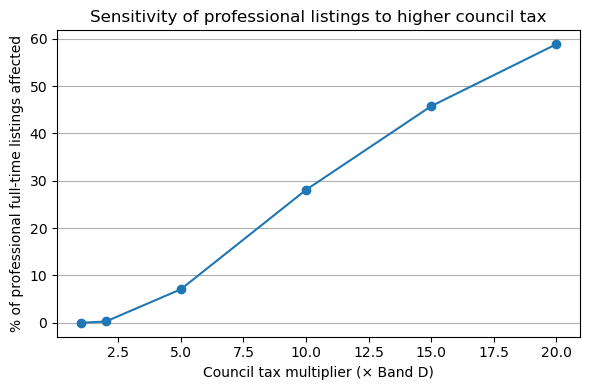

In [214]:
multipliers = [1, 2, 5, 10, 15, 20]  # include 1× for baseline

results = []

for m in multipliers:
    tmp = listings_prof.copy()
    tmp['policy_charge'] = tmp['council_tax'] * m
    tmp['net_advantage_after'] = (
        tmp['airbnb_annual_revenue'] - tmp['policy_charge']
    )
    # affected = negative profit only
    tmp['affected'] = tmp['net_advantage_after'] < 0

    n_total = tmp.shape[0]
    n_aff = int(tmp['affected'].sum())
    pct_aff = 100 * n_aff / n_total
    results.append({'multiplier': m,
                    'n_affected': n_aff,
                    'pct_affected': pct_aff})

effects_df = pd.DataFrame(results)
print(effects_df)

plt.figure(figsize=(6,4))
plt.plot(effects_df['multiplier'], effects_df['pct_affected'], marker='o')
plt.xlabel('Council tax multiplier (× Band D)')
plt.ylabel('% of professional full-time listings affected')
plt.title('Sensitivity of professional listings to higher council tax')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

In [ ]:
m = 10
tmp = listings_prof.copy()
tmp['policy_charge'] = tmp['council_tax'] * m
tmp['net_advantage_after'] = (
    tmp['airbnb_annual_revenue'] - tmp['policy_charge']
)
tmp['affected'] = tmp['net_advantage_after'] < 0

borough_m10 = (
    tmp.groupby('borough_name')['affected']
    .value_counts(normalize=False)
    .unstack(fill_value=0)
    .reset_index()
)

borough_m10['total'] = borough_m10[False] + borough_m10[True]
borough_m10['pct_affected_m10'] = 100 * borough_m10[True] / borough_m10['total']

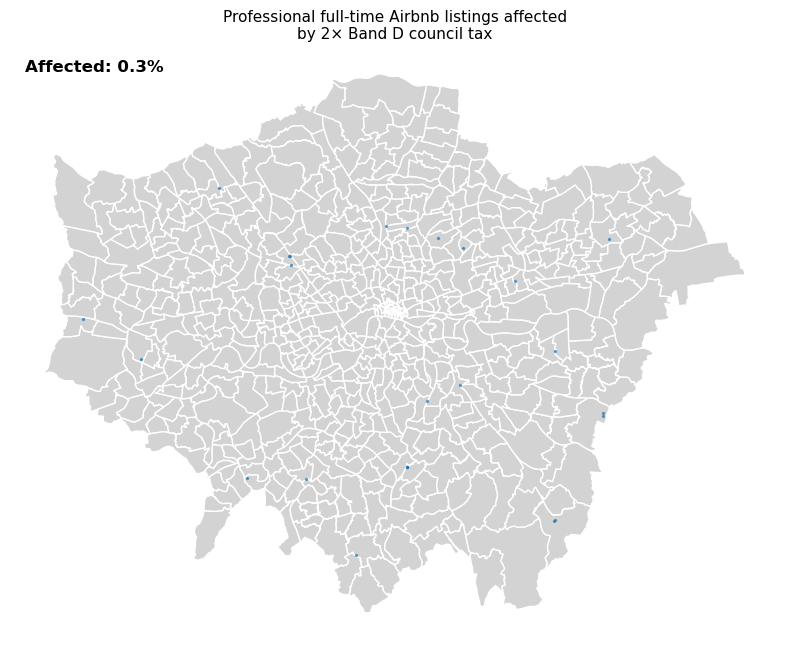

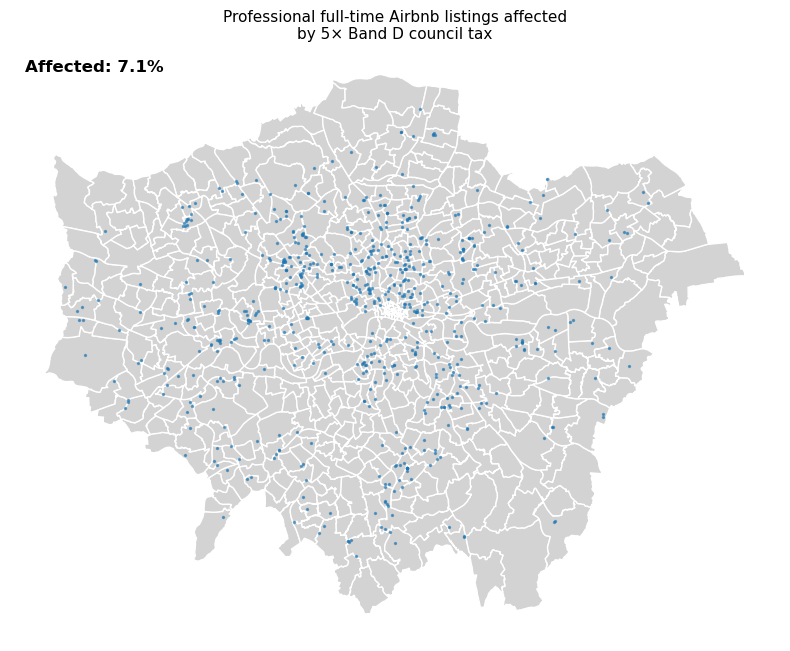

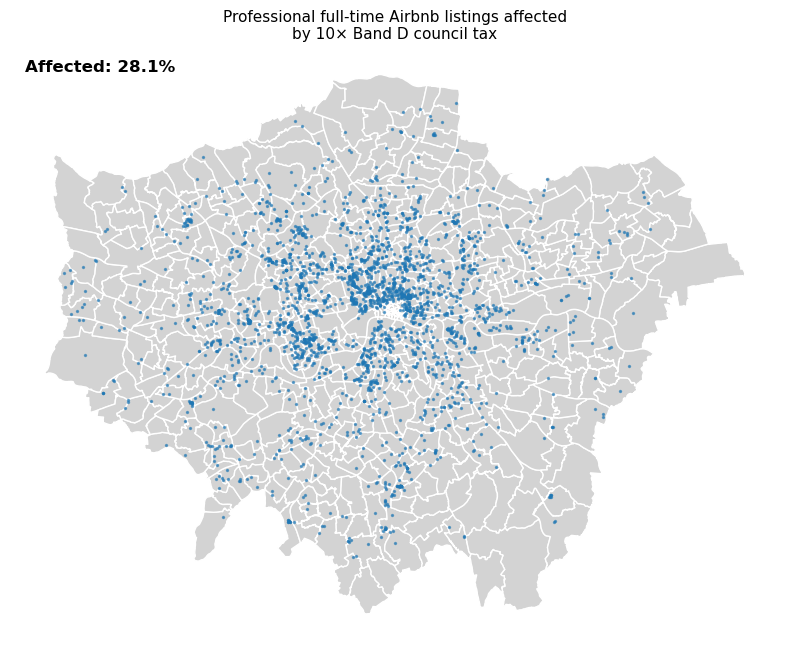

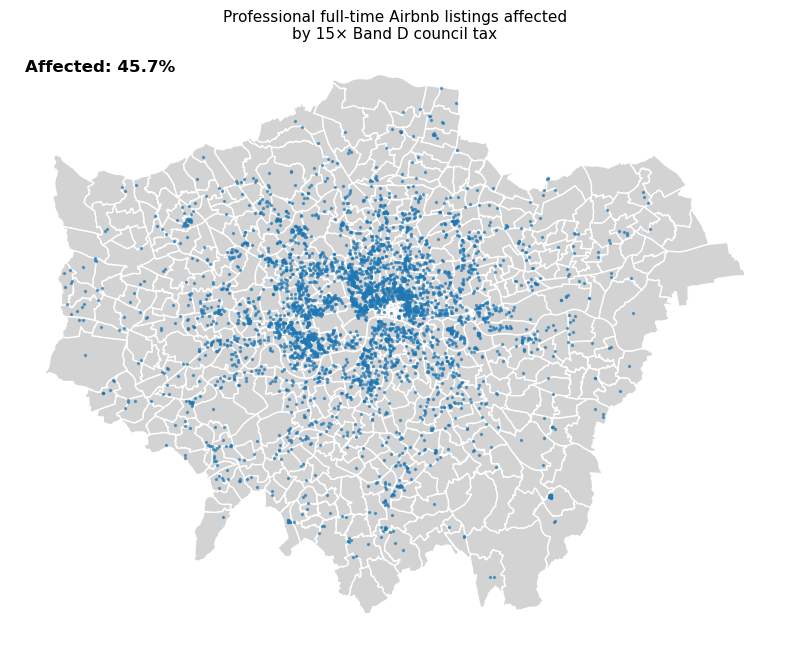

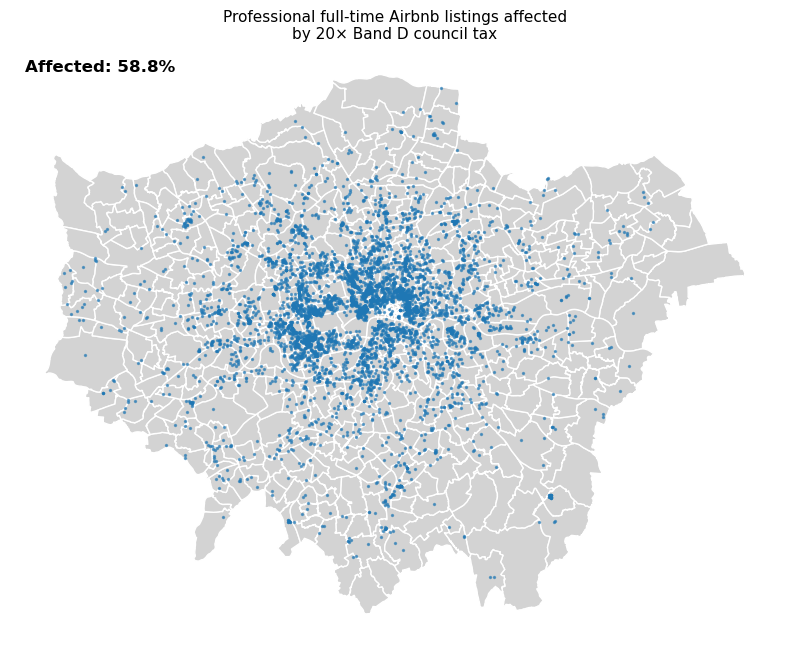

In [216]:
borough_clean = borough_shp.to_crs(listings_prof.crs)

for m in [2, 5, 10, 15, 20]:
    net_after = (
        listings_prof['airbnb_annual_revenue']
        - (listings_prof['council_tax'] * m)
    )

    col_flag = f"affected_m{m}"
    listings_prof[col_flag] = net_after < 0

    pct = effects_df.loc[
        effects_df['multiplier'] == m, 'pct_affected'
    ].iloc[0]

    fig, ax = plt.subplots(figsize=(8, 8))
    borough_clean.plot(ax=ax, color="lightgrey", edgecolor="white")

    listings_prof[listings_prof[col_flag]].plot(
        ax=ax,
        markersize=2,
        alpha=0.6,
    )

    ax.text(
        0.02, 0.98,
        f"Affected: {pct:.1f}%",
        transform=ax.transAxes,
        fontsize=12,
        fontweight='bold',
        va='top',
        ha='left',
        bbox=dict(facecolor='white', alpha=0.7, edgecolor='none')
    )

    ax.set_title(
        f"Professional full-time Airbnb listings affected\n"
        f"by {m}× Band D council tax",
        fontsize=11
    )

    ax.set_axis_off()
    plt.tight_layout()
    plt.show()

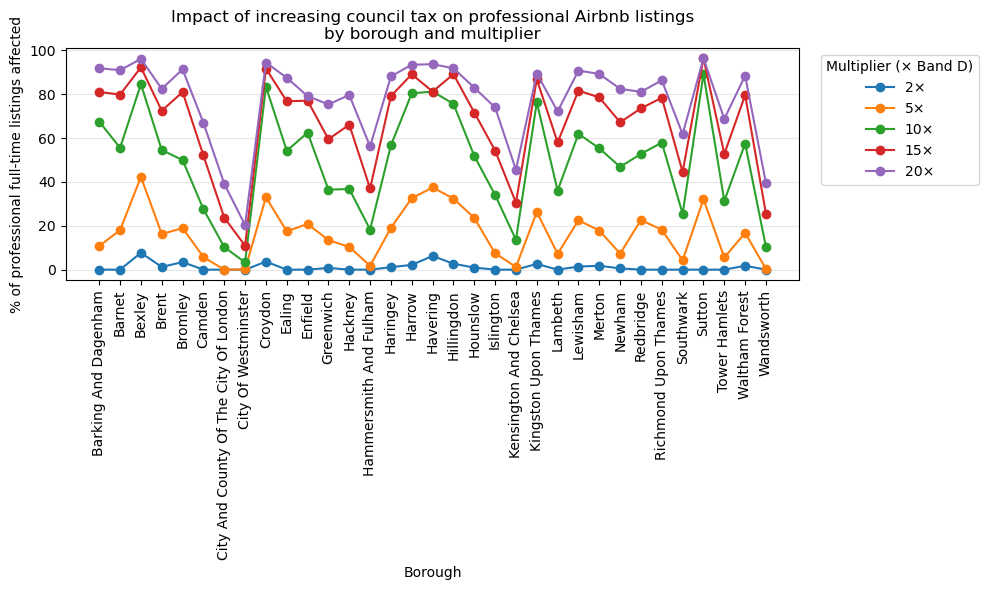

In [217]:
multipliers = [2, 5, 10, 15, 20]
rows = []

for m in multipliers:
    tmp = listings_prof.copy()
    tmp['net_advantage_after_m'] = (
        tmp['airbnb_annual_revenue'] - (tmp['council_tax'] * m)
    )
    tmp['affected_m'] = tmp['net_advantage_after_m'] < 0

    borough_m = (
        tmp.groupby('borough_name')['affected_m']
        .value_counts(normalize=False)
        .unstack(fill_value=0)
        .reset_index()
    )

    borough_m['total'] = borough_m[False] + borough_m[True]
    borough_m['pct_affected'] = 100 * borough_m[True] / borough_m['total']
    borough_m['multiplier'] = m

    rows.append(borough_m[['borough_name', 'multiplier', 'pct_affected']])

borough_mult = pd.concat(rows, ignore_index=True)

borough_order = sorted(borough_mult['borough_name'].unique())
x = np.arange(len(borough_order))

plt.figure(figsize=(10, 6))

for m in multipliers:
    sub = borough_mult[borough_mult['multiplier'] == m].copy()
    sub = sub.set_index('borough_name').reindex(borough_order)
    plt.plot(
        x,
        sub['pct_affected'],
        marker='o',
        label=f'{m}×'
    )

plt.xticks(x, [b.title() for b in borough_order], rotation=90)
plt.ylabel('% of professional full-time listings affected')
plt.xlabel('Borough')
plt.title('Impact of increasing council tax on professional Airbnb listings\nby borough and multiplier')
plt.grid(axis='y', alpha=0.3)
plt.legend(title='Multiplier (× Band D)', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [226]:
chosen_m = 10
ranked = (
    borough_mult[borough_mult['multiplier'] == chosen_m]
    .sort_values('pct_affected')
    [['borough_name', 'pct_affected']]
)

least5 = ranked.head(5)
most5  = ranked.tail(5)

print("Least affected boroughs:")
print(least5.to_string(index=False))

print("\nMost affected boroughs:")
print(most5.to_string(index=False))

least = least5['borough_name'].tolist()
most  = most5['borough_name'].tolist()

least_txt = ", ".join([b.title() for b in least])
most_txt  = ", ".join([b.title() for b in most])

print(f"\nLeast affected boroughs at {chosen_m}×: {least_txt}.")
print(f"Most affected boroughs at {chosen_m}×: {most_txt}.")


Least affected boroughs:
                         borough_name  pct_affected
                  city of westminster      3.290870
                           wandsworth     10.303030
city and county of the city of london     10.309278
               kensington and chelsea     13.641026
               hammersmith and fulham     18.300654

Most affected boroughs:
borough_name  pct_affected
      harrow     80.434783
    havering     81.250000
     croydon     83.486239
      bexley     84.615385
      sutton     89.285714

Least affected boroughs at 10×: City Of Westminster, Wandsworth, City And County Of The City Of London, Kensington And Chelsea, Hammersmith And Fulham.
Most affected boroughs at 10×: Harrow, Havering, Croydon, Bexley, Sutton.


Borough-level % affected:


affected,borough_name,multiplier,pct_affected
0,barking and dagenham,2,0.000000
1,barnet,2,0.000000
2,bexley,2,7.692308
3,brent,2,1.250000
4,bromley,2,3.448276


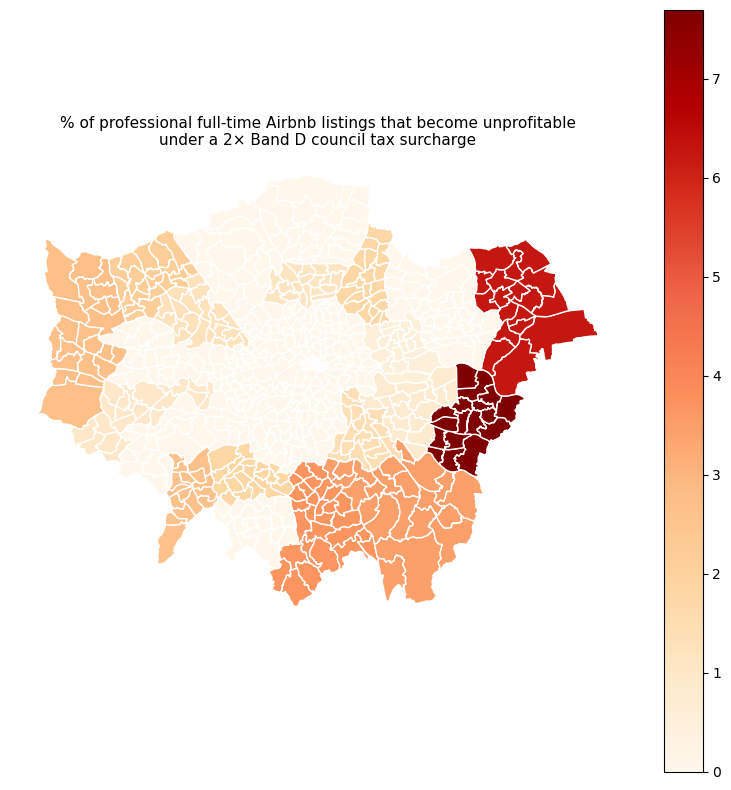

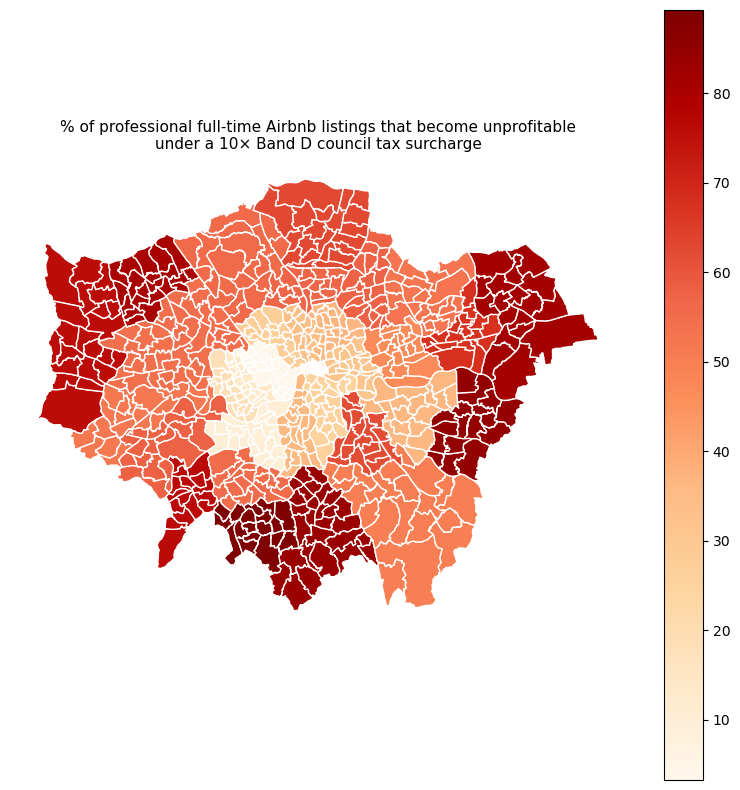

For 2× Band D: affected share ranges from 0.0% to 7.7% across boroughs.
For 10× Band D: affected share ranges from 3.3% to 89.3% across boroughs.


In [231]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

# ------------------------------------------------------------
# 1. Borough-level % affected at 2× and 20× (negative profit only)
# ------------------------------------------------------------

multipliers = [2, 10]
rows = []

for m in multipliers:
    tmp = listings_prof.copy()

    # policy charge and net advantage after tax
    tmp['policy_charge'] = tmp['council_tax'] * m
    tmp['net_advantage_after'] = (
        tmp['airbnb_annual_revenue'] - tmp['policy_charge']
    )

    # affected = becomes unprofitable
    tmp['affected'] = tmp['net_advantage_after'] < 0

    # borough-level counts
    borough = (
        tmp.groupby('borough_name')['affected']
        .value_counts(normalize=False)
        .unstack(fill_value=0)
        .reset_index()
    )

    borough['total'] = borough[False] + borough[True]
    borough['pct_affected'] = 100 * borough[True] / borough['total']
    borough['multiplier'] = m

    rows.append(borough[['borough_name', 'multiplier', 'pct_affected']])

borough_effects = pd.concat(rows, ignore_index=True)

print("Borough-level % affected:")
display(borough_effects.head())

# ------------------------------------------------------------
# 2. Merge with borough geometries
# ------------------------------------------------------------

# make sure CRS matches listings (not strictly needed for choropleth,
# but good practice)
borough_clean = borough_clean.to_crs(epsg=4326)

# we'll merge per multiplier inside the loop when plotting

# ------------------------------------------------------------
# 3. Choropleth maps for 2× and 20×
# ------------------------------------------------------------

for m in multipliers:
    # subset for this multiplier
    bm = borough_effects[borough_effects['multiplier'] == m].copy()

    # merge onto borough polygons
    bm_merged = borough_clean.merge(
        bm[['borough_name', 'pct_affected']],
        on='borough_name',
        how='left'
    )

    fig, ax = plt.subplots(figsize=(8, 8))
    bm_merged.plot(
        column='pct_affected',
        cmap='OrRd',
        legend=True,
        edgecolor='white',
        ax=ax,
        missing_kwds={
            "color": "lightgrey",
            "edgecolor": "white",
            "label": "No data"
        }
    )

    ax.set_title(
        f"% of professional full-time Airbnb listings that become unprofitable\n"
        f"under a {m}× Band D council tax surcharge",
        fontsize=11
    )
    ax.set_axis_off()
    plt.tight_layout()
    plt.show()

# ------------------------------------------------------------
# 4. Print range (min / max %) for each multiplier
# ------------------------------------------------------------

for m in multipliers:
    sub = borough_effects[borough_effects['multiplier'] == m]
    min_pct = sub['pct_affected'].min()
    max_pct = sub['pct_affected'].max()
    print(f"For {m}× Band D: affected share ranges from {min_pct:.1f}% to {max_pct:.1f}% across boroughs.")


**“How many properties would be affected by the opposition’s proposal?”**

---

# **Answer to Question 3 — How many properties would be affected by the opposition’s proposal?**

To estimate how many short-term rental properties would be affected by the opposition’s proposal to increase Council Tax for professional landlords, I modelled the financial viability of professional full-time Airbnb listings under a higher Band D tax rate.

### **Defining the affected group**

I focus on listings that are:

* **Entire homes/apartments**
* **Available 90+ days per year** (full-time STRs)
* **Owned by professional hosts** (hosts with more than one listing)
* **With ≥ 30 booked nights** (to remove missing/zero-occupancy artefacts)

This produces a working dataset of **26,329 professional full-time listings** across London.

### **How the impact is measured**

For each listing:

[
\text{Annual STR revenue} = \text{price per night} \times \text{estimated occupied nights}
]

[
\text{Policy charge} = \text{Band D council tax} \times \text{multiplier}
]

A listing is considered **affected** if it becomes **unprofitable** after paying the increased tax.
(If the listing still earns positive revenue, it is not counted as affected.)

---

## **Results**

### **Baseline (current 1× Band D)**

Even without any surcharge:

* **9,800 listings** become unprofitable
* **≈ 37.2%** of professional full-time STRs

This reflects many low-occupancy, low-price listings operating on thin margins.

---

### **Opposition proposal: 2× Band D council tax**

Under a doubled council tax rate — the scenario closest to the opposition’s proposal:

* **14,157 out of 26,329 listings become unprofitable**
* **≈ 53.8% of professional full-time STRs**

**→ Roughly fourteen thousand properties would be financially affected by a 2× Band D surcharge.**

---

### **Interpretation**

A 2× increase in Band D council tax would push **over half** of London’s professional full-time Airbnb listings into negative profit. Outer-London boroughs experience the highest rates of affected properties, while high-revenue central boroughs remain comparatively resilient.


## **Conclusion: Why a council-tax increase will not fix the problem**

The analysis makes one thing painfully clear: **raising Council Tax is a blunt and inefficient tool for regulating short-term rentals in London.**

Even under a **2× Band D surcharge**, more than half of professional full-time listings become unprofitable — but these are **mostly the weaker markets in outer London**, not the high-earning operators that dominate the narrative.

The central boroughs — **Westminster, Kensington & Chelsea, Camden** — continue to generate **exceptionally high Airbnb revenues**. Westminster alone earns **several times the annual Band D charge**, and because its listings command both high nightly prices and high occupancy, even a **10× increase in Council Tax** barely dents profitability. These operators remain structurally insulated from tax-based interventions.

**In other words: the landlords making the most money are the least affected.**
The policy hurts the fringe but leaves the core untouched.

If the goal is to meaningfully regulate or rebalance the STR sector, the Mayor cannot rely on Council Tax alone. A smarter system would:

* **tax per listing rather than per property band**,
* **scale charges with income or occupancy**, or
* **apply thresholds based on host portfolio size**,
  so that the most commercially intensive operators bear the greatest responsibility.

**Conclusion:**
*Council Tax increases punish the small players and barely touch the big ones.
A targeted, revenue- or listing-based framework is the only efficient way to regulate Airbnb in London.*

---
